# Individual task
## Task 2

s234829 - Mia Isabella Lund

Importing packages

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Data overview and preprocessing

Importing dataset

In [42]:
path = os.getcwd()
csv_file = "HR_data.csv"
path_to_file = os.path.join(path,csv_file)
df = pd.read_csv(path_to_file, index_col=0)
df

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...
163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2
165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2
166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


<AxesSubplot: ylabel='Frustrated'>

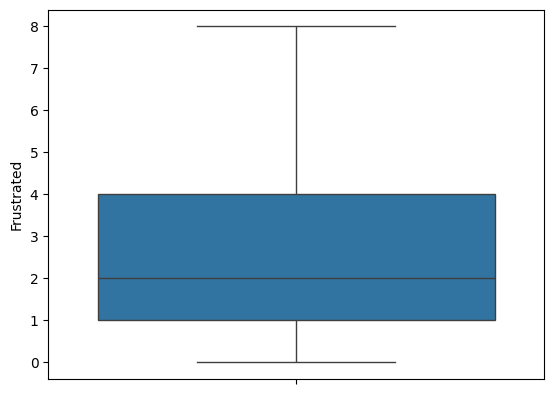

In [43]:
sns.boxplot(data=df, y="Frustrated")

<AxesSubplot: xlabel='Individual', ylabel='Frustrated'>

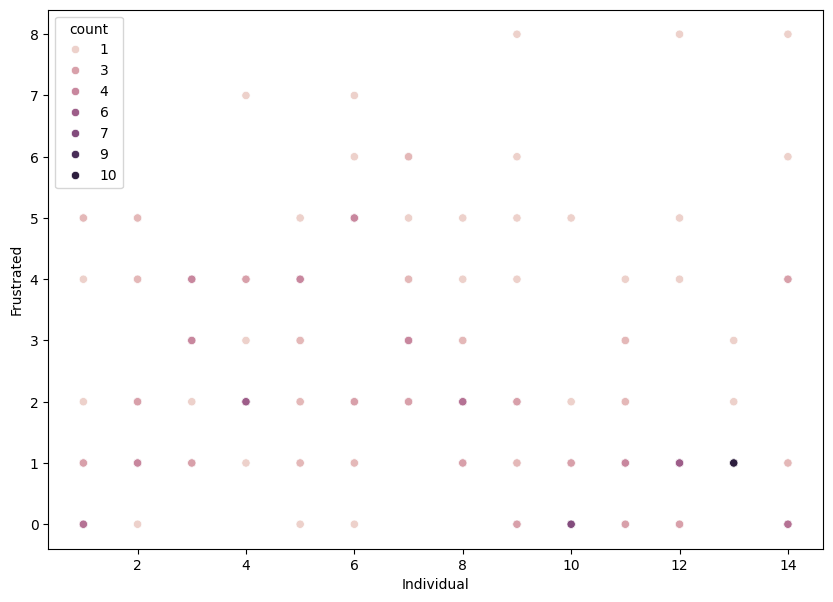

In [47]:
df_plot = df.copy()
df_plot['count'] = df_plot.groupby(['Individual', 'Frustrated'])['Individual'].transform('count')
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_plot, x='Individual', y='Frustrated', hue='count',)


The columns "Round, Phase, Cohort" are text values and needs to be encoded

In [ ]:
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)
df_encoded

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,106,116,49,133,66,88,2,2,0,1,1,0
1,42,45,27,77,31,65,2,1,0,1,5,0
2,63,72,44,85,43,59,2,0,0,1,0,0
3,111,112,66,126,74,119,1,2,0,1,1,0
4,99,82,104,105,100,103,1,1,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
163,64,63,137,15,113,54,3,1,13,0,8,1
164,1,0,117,3,9,2,3,0,13,0,0,1
165,8,18,57,21,4,8,0,2,13,0,1,1
166,40,43,21,72,19,39,0,1,13,0,4,1


Quick describtion of the dataset. Looking for missing values or something strange

In [ ]:
df_encoded.describe()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000
mean,82.369048,81.666667,81.642857,81.869048,79.101190,82.113095,1.500000,1.000000,6.50000,0.500000,2.291667,0.428571
std,47.721066,46.892368,47.834205,47.160645,45.975865,47.648718,1.121376,0.818938,4.04318,0.501495,1.924796,0.496351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,41.750000,41.750000,39.750000,41.750000,39.750000,41.750000,0.750000,0.000000,3.00000,0.000000,1.000000,0.000000
50%,82.500000,82.500000,81.500000,82.500000,79.500000,81.500000,1.500000,1.000000,6.50000,0.500000,2.000000,0.000000
75%,123.250000,121.250000,123.250000,122.250000,119.250000,123.250000,2.250000,2.000000,10.00000,1.000000,4.000000,1.000000
max,164.000000,162.000000,164.000000,162.000000,158.000000,164.000000,3.000000,2.000000,13.00000,1.000000,8.000000,1.000000


No missing values, nothing to out of the ordinary. 

Looking at the correlation and distribution of the variables

In [ ]:
# sns.pairplot(df_encoded)

Normalizing ratio data

In [ ]:
df_HR = df.iloc[:,0:6]
df_HR_norm = (df_HR - df_HR.min()) / (df_HR.max() - df_HR.min())


df_ready = df_encoded.copy()
df_ready.update(df_HR_norm)
df_ready

C:\Users\mia\AppData\Local\Temp\ipykernel_55740\2280723832.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.53129446 0.35137505 0.41296684 0.55580986 0.51473094 0.43873078
 0.51295791 0.39565372 0.42633698 0.39373662 0.43487925 0.52654213
 0.32836961 0.45351687 0.5380051  0.40166562 0.37581337 0.38088964
 0.28536409 0.22441828 0.31803176 0.54599545 0.50842743 0.30433591
 0.69379714 0.57440778 0.65536544 0.6750327  0.69369725 0.73020625
 0.82961982 0.63968285 0.67803709 0.73648219 0.71249967 0.54530605
 0.27711037 0.63685752 0.08986396 0.6008243  0.22580661 0.2857381
 0.25103643 0.29687439 0.85512402 0.49960792 1.         0.27690844
 0.18659268 0.34177175 0.32365917 0.13696367 0.45751893 0.30365254
 0.30912956 0.33250829 0.14220239 0.5288043  0.51295567 0.30864442
 0.32556899 0.59613507 0.63419452 0.4605853  0.68633158 0.59307099
 0.38846566 0.55801853 0.65535565 0.44288982 0.57340266 0.51302594
 0.5229667  0.

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0.531294,0.585767,0.118893,0.690164,0.195794,0.359630,2,2,0,1,1,0
1,0.351375,0.403436,0.079560,0.489836,0.119520,0.308163,2,1,0,1,5,0
2,0.412967,0.471902,0.114818,0.514754,0.149141,0.293502,2,0,0,1,0,0
3,0.555810,0.582822,0.152611,0.660328,0.218750,0.480410,1,2,0,1,1,0
4,0.514731,0.501104,0.247354,0.601311,0.296209,0.409600,1,1,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.418701,0.447853,0.410262,0.172131,0.346268,0.285010,3,1,13,0,8,1
164,0.012840,0.000000,0.282961,0.025902,0.059094,0.044002,3,0,13,0,0,1
165,0.177646,0.271534,0.130490,0.222623,0.036730,0.140531,0,2,13,0,1,1
166,0.347594,0.400245,0.073536,0.474426,0.087678,0.247234,0,1,13,0,4,1


## Models

setting up the models, training and predictions

In [ ]:
y = df_ready['Frustrated']
X = df_ready.drop(columns=['Frustrated'])

groups = df_ready['Individual']

logo = LeaveOneGroupOut()
logo.get_n_splits(X, y, groups)
logo.get_n_splits(groups=groups)

true = []

# knn 
knn = KNeighborsClassifier()
knn_guess = []

# log reg 
log_reg = LogisticRegression(max_iter=1000, multi_class="ovr")
log_reg_guess = []

# random forest
rf_classifier = RandomForestClassifier()
rf_guess = []

for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
    # print(f"Fold {i}:")
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]

    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    true.extend(y_test)

    # KNN  
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    knn_guess.extend(y_pred)

    # log
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    log_reg_guess.extend(y_pred)

    # random forest
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    rf_guess.extend(y_pred)


Confusion Matrix

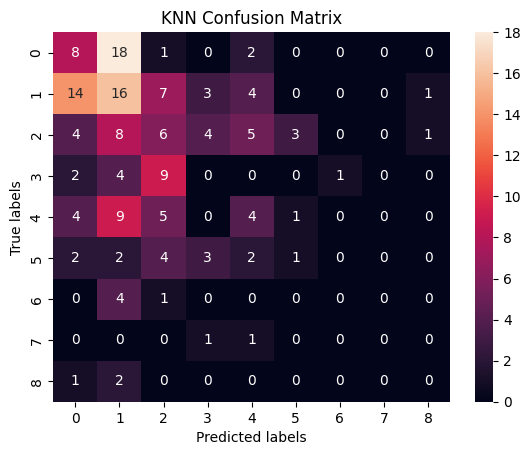

In [ ]:
cm = confusion_matrix(true, knn_guess)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('KNN Confusion Matrix'); 

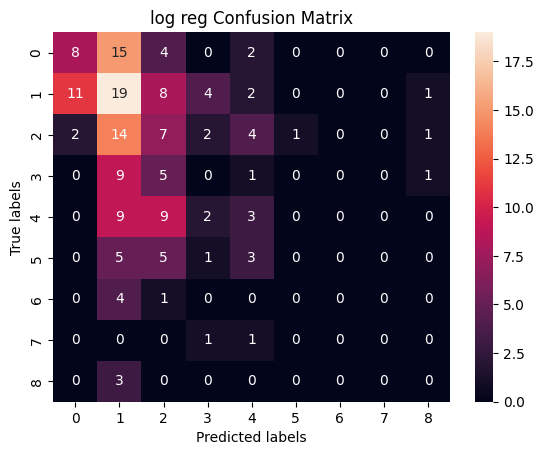

In [ ]:
cm = confusion_matrix(true, log_reg_guess)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('log reg Confusion Matrix'); 

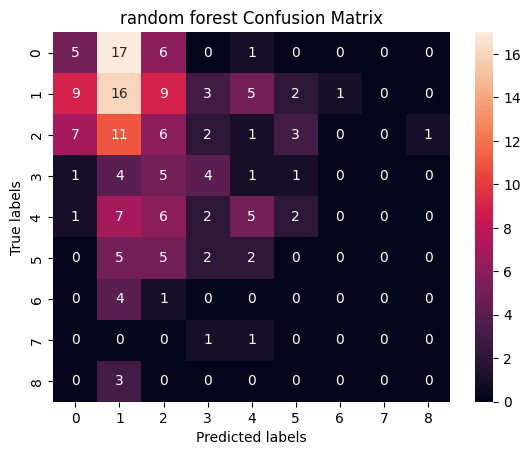

In [ ]:
cm = confusion_matrix(true, rf_guess)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('random forest Confusion Matrix'); 

scores

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def score(y_true,y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {round(precision,2)}")
    print(f"Recall: {round(recall,2)}")
    print(f"Accuracy: {round(accuracy,2)}")
    print(f"F1 Score: {round(f1,2)}")

print("KNN")
score(true,knn_guess)

print("log reg")
score(true,log_reg_guess)

print("rf")
score(true,rf_guess)


KNN
Precision: 0.19
Recall: 0.21
Accuracy: 0.21
F1 Score: 0.19
log reg
Precision: 0.19
Recall: 0.22
Accuracy: 0.22
F1 Score: 0.2
rf
Precision: 0.2
Recall: 0.21
Accuracy: 0.21
F1 Score: 0.2


c:\Users\mia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

def score_class(y_true,y_pred):
    classes = set(y_true)
    precision = precision_score(y_true, y_pred, average=None, labels=list(classes))
    recall = recall_score(y_true, y_pred, average=None, labels=list(classes))
    f1 = f1_score(y_true, y_pred, average=None, labels=list(classes))
    accuracy = accuracy_score(y_true, y_pred)
    for cls, p, r, f in zip(classes, precision, recall, f1):
        print(f"Class {cls} - Precision: {round(p,2)}, Recall: {round(r,2)}, F1 Score: {round(f,2)}")

print("KNN")
score_class(true,knn_guess)
print("log")
score_class(true,log_reg_guess)
print("RF")
score_class(true,rf_guess)

KNN
Class 0 - Precision: 0.23, Recall: 0.28, F1 Score: 0.25
Class 1 - Precision: 0.25, Recall: 0.36, F1 Score: 0.3
Class 2 - Precision: 0.18, Recall: 0.19, F1 Score: 0.19
Class 3 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Class 4 - Precision: 0.22, Recall: 0.17, F1 Score: 0.2
Class 5 - Precision: 0.2, Recall: 0.07, F1 Score: 0.11
Class 6 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Class 7 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Class 8 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
log
Class 0 - Precision: 0.38, Recall: 0.28, F1 Score: 0.32
Class 1 - Precision: 0.24, Recall: 0.42, F1 Score: 0.31
Class 2 - Precision: 0.18, Recall: 0.23, F1 Score: 0.2
Class 3 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Class 4 - Precision: 0.19, Recall: 0.13, F1 Score: 0.15
Class 5 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Class 6 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Class 7 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Class 8 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
RF
Class 0 - Pr

c:\Users\mia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
